The hypothesis:

Null Hypothesis (H0): The design does not increase conversion rates.

Alternative Hypothesis (H1): The new design increases conversion rates.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest


In [10]:
#Simulate data
np.random.seed(42)
data_size = 1000
control_group = pd.DataFrame({
    'group': 'control',
    'converted': np.random.binomial(1, 0.1, data_size) #10% conversion rate
})
treatment_group = pd.DataFrame({
    'group': 'treatment',
    'converted': np.random.binomial(1, 0.12, data_size) #12% conversion rate
})

data = pd.concat([control_group, treatment_group]).reset_index(drop=True)
data.head()

,group,converted
0,control,0
1,control,1
2,control,0
3,control,0
4,control,0


In [11]:
conversion_rates = data.groupby('group')['converted'].mean().reset_index()
conversion_rates.columns = ['group', 'conversion_rate']
conversion_rates

,group,conversion_rate
0,control,0.100
1,treatment,0.112


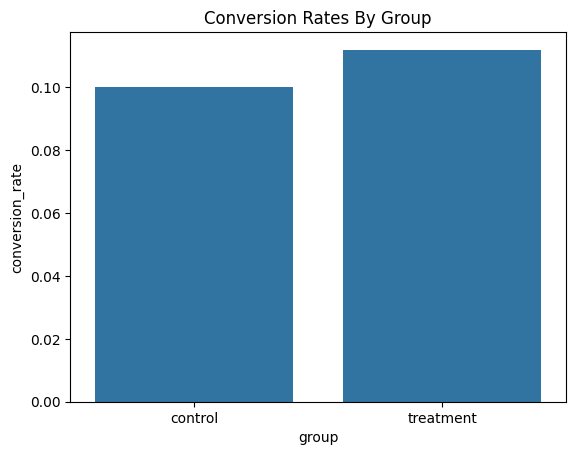

In [12]:
sns.barplot(x='group', y='conversion_rate', data=conversion_rates)
plt.title('Conversion Rates By Group')
plt.show()

In [13]:
control_conversions = data[data['group'] == 'control']['converted'].sum()
treatment_conversions = data[data['group'] == 'treatment']['converted'].sum()
n_control = data[data['group'] == 'control'].shape[0]
n_treatment = data[data['group'] == 'treatment'].shape[0]

z_stat, p_value = proportions_ztest([treatment_conversions, control_conversions], [n_treatment, n_control])
print(f'Z-Statistic: {z_stat}, P-value: {p_value}')

Z-Statistic: 0.8716548604640172, P-value: 0.3833966925145822


In [14]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hyphothesis. The new design increases conversion rates.")
else:
    print("Fail to reject the null hypothesis. No significant difference in conversion rates.")

Fail to reject the null hypothesis. No significant difference in conversion rates.


# A/B Testing for Conversion Rate Optimization

**Objective**: To determine if the new design increases conversion rates.

**Hypothesis**:
- H0: The new design does not increase conversion rates.
- H1: The new design increases conversion rates.

**Results**:
- Control group conversion rate: 10%
- Treatment group conversion rate: 11.2%
- Z-Statistic: Z
- P-Value: P

**Conclusion**: Based on the p-value, we fail to reject the null hypothesis, indicating no significant difference in conversion rates.
